# Project: Investigate a Dataset - [Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
This data set contains information about movies, including user ratings and revenue.
### Question(s) for Analysis
which genres are the most popular ?

which genres have highest budget per movie?

which genres have highest revenue per movie ?

which years have the most popular movies ?

which year did producers spend the most on the industry?

which year did producers got the highest revenue?

which production companies have the highest budgets per movie ?

which production companies have the highest revenue per movie ?

do movies with the highest popularity have the highest budget ?

do movies with the highest popularity have the highest revenue ?

do movies with the highest budget have the highest revenue ?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing the libraries

<a id='wrangling'></a>
## Data Wrangling
started by uploading the data and then used some functions to get some information before the claening like .shape , .describe() and .info()

In [ ]:
df = pd.read_csv('tmdb-movies.csv')
#uploading the data set

In [ ]:
df.shape
df.describe()
df.info()
#getting information about the dataframe to get reddy for cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### Data Cleaning
there is some null data in some columns we do not need so we will remove them by .dropna function

In [ ]:
df.isnull().sum()
#checking for null values

,0
id,0
imdb_id,10
popularity,0
budget,0
revenue,0
original_title,0
cast,76
homepage,7930
director,44
tagline,2824


since we do not need the imdb_id,cast,homepage,director,tagline,keywords,overview we will drop the columns since we do need the production_companies and genres we will drop the null rows only

In [ ]:
df.dropna(subset=['genres'], inplace=True)
df.dropna(subset=['production_companies'], inplace=True)
df.isnull().sum()
#droping the null rows

,0
id,0
imdb_id,4
popularity,0
budget,0
revenue,0
original_title,0
cast,35
homepage,7169
director,20
tagline,2170


In [ ]:
df.dropna(inplace=True, axis=1)
#droping the null columns

In [ ]:
# Split the 'genres' column by '|' and create a list of genres for each row
df['genres'] = df['genres'].astype(str).str.split('|')

# Explode the 'genres' column to create new rows for each genre
df = df.explode('genres', ignore_index=True)

# Now 'df' will have individual genres in separate rows
df

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,32.985763,150000000,1513528810,Jurassic World,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,32.985763,150000000,1513528810,Jurassic World,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24757,39768,0.065141,0,0,Beregis Avtomobilya,94,Mystery,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
24758,39768,0.065141,0,0,Beregis Avtomobilya,94,Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
24759,21449,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00
24760,21449,0.064317,0,0,"What's Up, Tiger Lily?",80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [ ]:
# Split the 'production_companies' column by '|' and create a list of production_companies for each row
df['production_companies'] = df['production_companies'].str.split('|')

# Explode the 'production_companies' column to create new rows for each production_companie
df = df.explode('production_companies', ignore_index=True)

# Now 'df' will have individual production_companies in separate rows
df

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,Amblin Entertainment,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,Legendary Pictures,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,Fuji Television Network,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59101,39768,0.065141,0,0,Beregis Avtomobilya,94,Mystery,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
59102,39768,0.065141,0,0,Beregis Avtomobilya,94,Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
59103,21449,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00
59104,21449,0.064317,0,0,"What's Up, Tiger Lily?",80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [ ]:
df.shape
df.describe()
df.info()
#getting information about the dataframe after the cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59106 entries, 0 to 59105
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    59106 non-null  int64  
 1   popularity            59106 non-null  float64
 2   budget                59106 non-null  int64  
 3   revenue               59106 non-null  int64  
 4   original_title        59106 non-null  object 
 5   runtime               59106 non-null  int64  
 6   genres                59106 non-null  object 
 7   production_companies  59106 non-null  object 
 8   release_date          59106 non-null  object 
 9   vote_count            59106 non-null  int64  
 10  vote_average          59106 non-null  float64
 11  release_year          59106 non-null  int64  
 12  budget_adj            59106 non-null  float64
 13  revenue_adj           59106 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 6.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis
here we will start looking for answers to our questions and visualize our findings

### Research Question 1
which genres are the most popular ?

In [ ]:
df_genre_popularity = df.groupby("genres")["popularity"].sum().sort_values(ascending=False)
df_genre_popularity.head(10)

,popularity
genres,
Drama,7814.842026
Action,6572.372664
Thriller,6525.689730
Comedy,5341.906805
Adventure,4810.922986
Science Fiction,3576.980895
Crime,2998.036809
Fantasy,2619.511075
Romance,2523.121314


<Axes: title={'center': 'Popular Genres'}, ylabel='Popularity'>

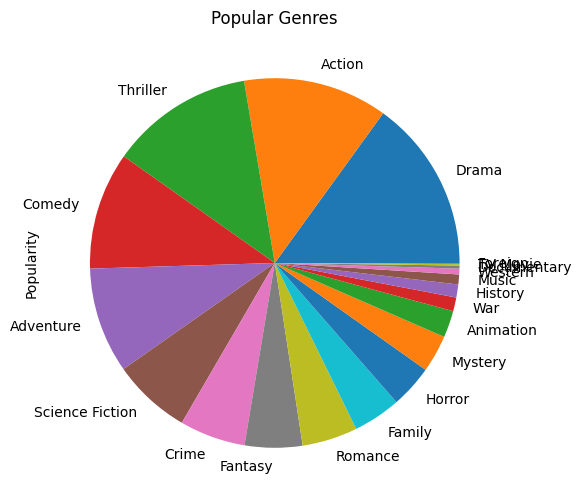

In [ ]:
df_genre_popularity.plot(kind='pie', figsize=(10, 6), xlabel='genres'.title(), ylabel='popularity'.title(), title='popular genres'.title())

### Research answer 1
drama is the most popular genre

### Research Question 2  (which genres have highest budget per movie ?)

In [ ]:
df_genre_budget = df.groupby("genres")["budget"].mean().sort_values(ascending=False)
df_genre_budget.head(10)

,budget
genres,
Adventure,5.021855e+07
Fantasy,4.655165e+07
Action,3.787147e+07
Science Fiction,3.685623e+07
Family,3.332051e+07
Animation,3.011515e+07
War,2.777379e+07
Western,2.581750e+07
History,2.425800e+07


<Axes: title={'center': 'Budget Genres'}, xlabel='Genres', ylabel='Budget'>

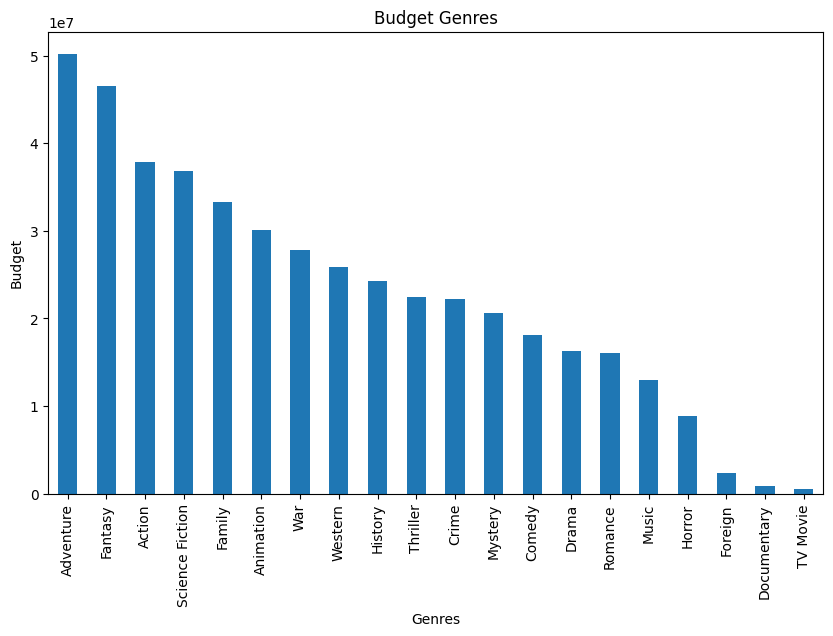

In [ ]:
df_genre_budget.plot(kind='bar', figsize=(10, 6), xlabel='genres'.title(), ylabel='budget'.title(), title='budget genres'.title())

### Research answer 2
Adventure movies have the highest budget per movie

### Research Question 3  (which genres have highest revenue per movie ?)

In [ ]:
df_genre_revenue = df.groupby("genres")["revenue"].mean().sort_values(ascending=False)
df_genre_revenue.head(10)

,revenue
genres,
Adventure,1.445267e+08
Fantasy,1.370131e+08
Science Fiction,1.002094e+08
Family,1.000402e+08
Action,9.680103e+07
Animation,9.505797e+07
War,6.340809e+07
Thriller,5.461271e+07
Crime,5.263668e+07


<Axes: title={'center': 'Revenue Genres'}, xlabel='Genres', ylabel='Revenue'>

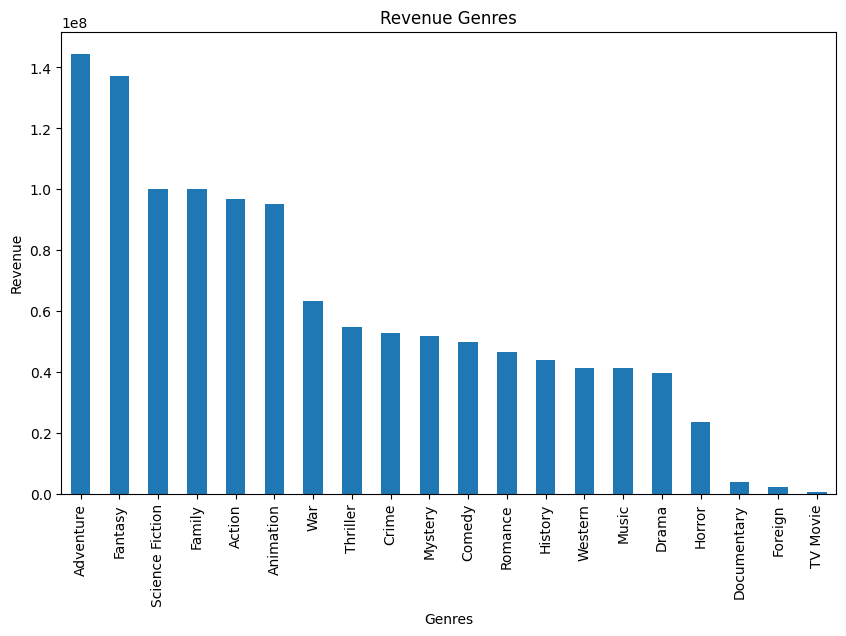

In [ ]:
df_genre_revenue.plot(kind='bar', figsize=(10, 6), xlabel='genres'.title(), ylabel='revenue'.title(), title='revenue genres'.title())

### Research answer 3
Adventure movies have the highest revenue per movie

### Research Question 4
which years have the most popular movies ?

In [ ]:
df_popularity_year = df.groupby("release_year")["popularity"].sum().sort_values(ascending=False)
df_popularity_year.head(10)

,popularity
release_year,
2015,5793.022445
2014,5140.525794
2013,3122.444155
2009,2857.544036
2011,2780.155537
2012,2493.082382
2010,2463.081794
2008,2353.623409
2007,2191.089700


<Axes: title={'center': 'Popularity Year'}, xlabel='Year', ylabel='Popularity'>

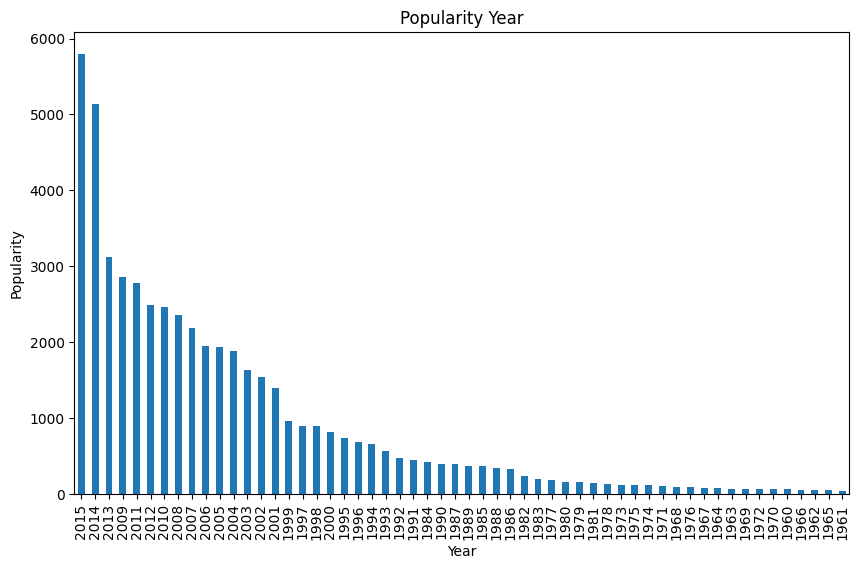

In [ ]:
df_popularity_year.plot(kind='bar', figsize=(10, 6), xlabel='year'.title(), ylabel='popularity'.title(), title='popularity year'.title())

### Research answer 4
2015 movies are the most popular

### Research Question 5
which year did producers spend the most on the industry?

In [ ]:
df_budget_year = df.groupby("release_year")["budget"].sum().sort_values(ascending=False)
df_budget_year.head(10)

,budget
release_year,
2013,93988237332
2009,93465491843
2011,87982276769
2010,84933481817
2014,81908299473
2015,78992210351
2007,78632622880
2004,76689052360
2005,75811162162


<Axes: title={'center': 'Budget Year'}, xlabel='Year', ylabel='Budget'>

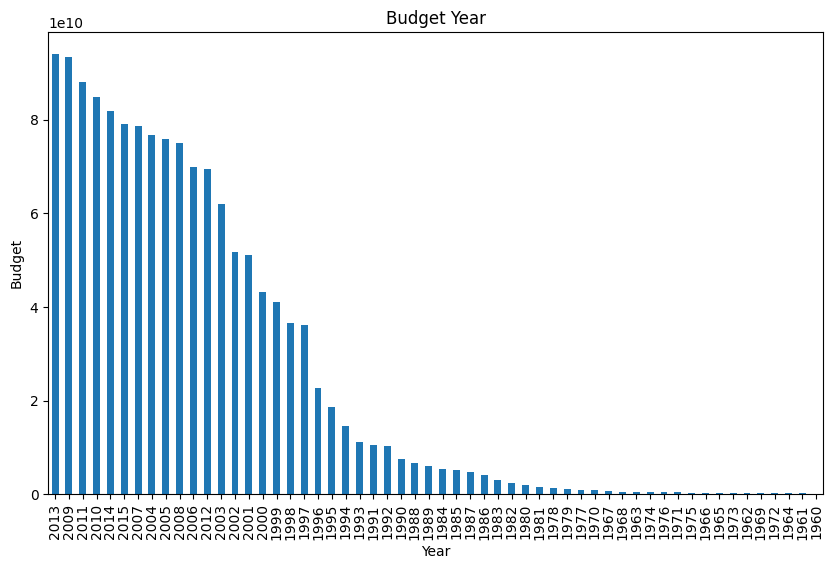

In [ ]:
df_budget_year.plot(kind='bar', figsize=(10, 6), xlabel='year'.title(), ylabel='budget'.title(), title='budget year'.title())

### Research answer 5
2013 movies have the highest budget

### Research Question 6
which year did producers got the highest revenue?

In [ ]:
df_revenue_year = df.groupby("release_year")["revenue"].sum().sort_values(ascending=False)
df_revenue_year.head(10)

,revenue
release_year,
2015,284999455620
2009,258562769207
2014,249613696849
2013,230477302486
2011,225450339042
2007,206858050627
2010,206267555113
2012,198882231945
2008,179438478334


<Axes: title={'center': 'Revenue Year'}, xlabel='Year', ylabel='Revenue'>

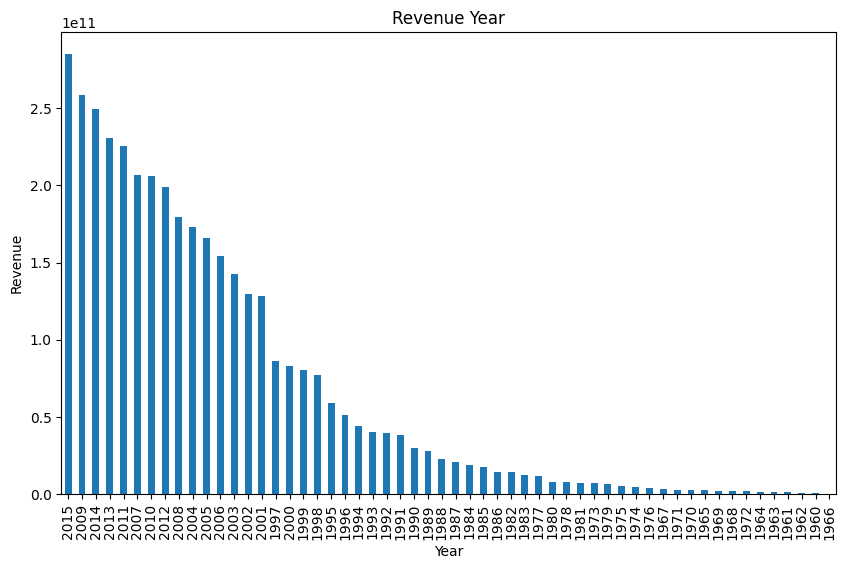

In [ ]:
df_revenue_year.plot(kind='bar', figsize=(10, 6), xlabel='year'.title(), ylabel='revenue'.title(), title='revenue year'.title())

### Research answer 6
2015 movies have the highest revenue

### Research Question 7
which production companies have the highest budgets per movie ?

In [ ]:
df_production_companies_budget = df.groupby("production_companies")["budget"].mean().sort_values(ascending=False)
df_production_companies_budget.head(10)

,budget
production_companies,
Boram Entertainment Inc.,425000000.0
Silver Bullet Productions (II),255000000.0
Blind Wink Productions,255000000.0
3Foot7,250000000.0
Second Mate Productions,250000000.0
B24,245000000.0
Ozumi Films,225000000.0
Propeler,225000000.0
Film 44,209000000.0


<Axes: title={'center': 'Production_Companies Budget'}, xlabel='Production_Companies', ylabel='Budget'>

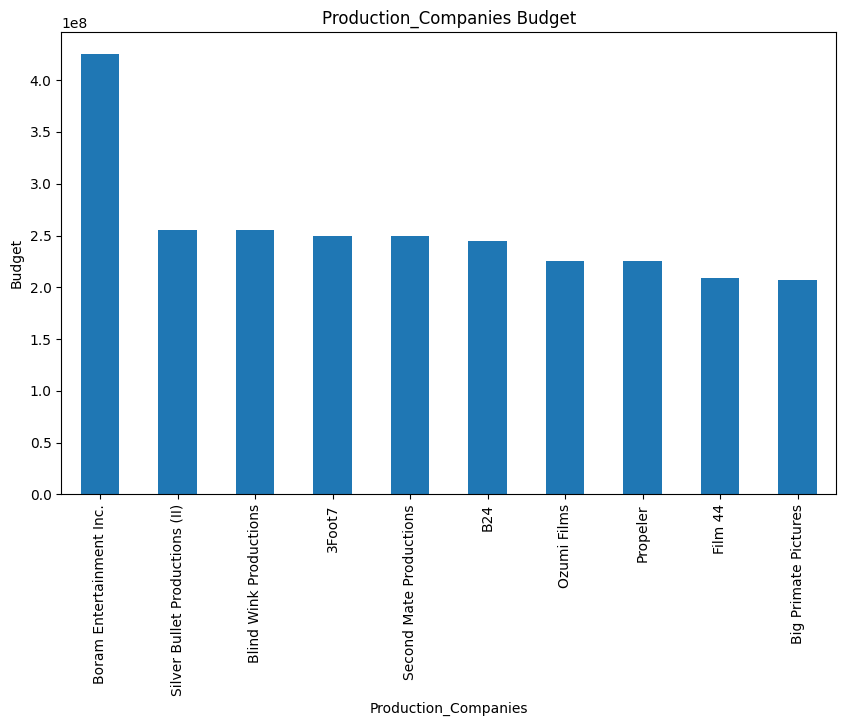

In [ ]:
df_production_companies_budget.head(10).plot(kind='bar', figsize=(10, 6), xlabel='production_companies'.title(), ylabel='budget'.title(), title='production_companies budget'.title())

### Research answer 7
Boram Entertainment Inc. have the highest budget per movie

### Research Question 8
which production companies have the highest revenue per movie ?

In [ ]:
df_production_companies_revenue = df.groupby("production_companies")["revenue"].mean().sort_values(ascending=False)
df_production_companies_revenue.head(10)

,revenue
production_companies,
Truenorth Productions,2.068178e+09
Second Mate Productions,1.013330e+09
3Foot7,9.551198e+08
Harry Potter Publishing Rights,9.382127e+08
Cool Music,9.382127e+08
Patalex IV Productions Limited,8.959210e+08
B24,8.806746e+08
MIRACLE Productions GmbH & Co. KG,8.766885e+08
Disney Enterprises,8.646260e+08


<Axes: title={'center': 'Production_Companies Revenue'}, xlabel='Production_Companies', ylabel='Revenue'>

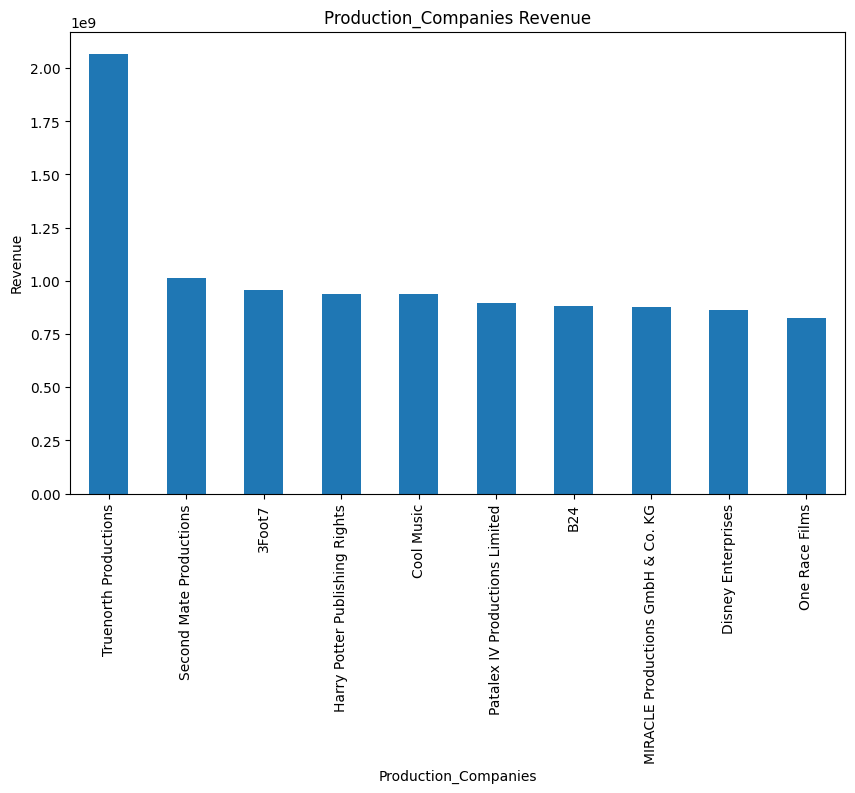

In [ ]:
df_production_companies_revenue.head(10).plot(kind='bar', figsize=(10, 6), xlabel='production_companies'.title(), ylabel='revenue'.title(), title='production_companies revenue'.title())

### Research answer 8
Truenorth Productions have the highest revenue per movie

### Research Question 9
do movies with the highest popularity have the highest budget ?

In [ ]:
df_popularity_budget = df.groupby("popularity")["budget"].mean().sort_values(ascending=False)
df_popularity_budget.head(10)

,budget
popularity,
0.250540,425000000.0
4.955130,380000000.0
4.965391,300000000.0
5.944927,280000000.0
1.957331,270000000.0
1.588457,260000000.0
2.865684,260000000.0
2.520912,258000000.0
1.214510,255000000.0


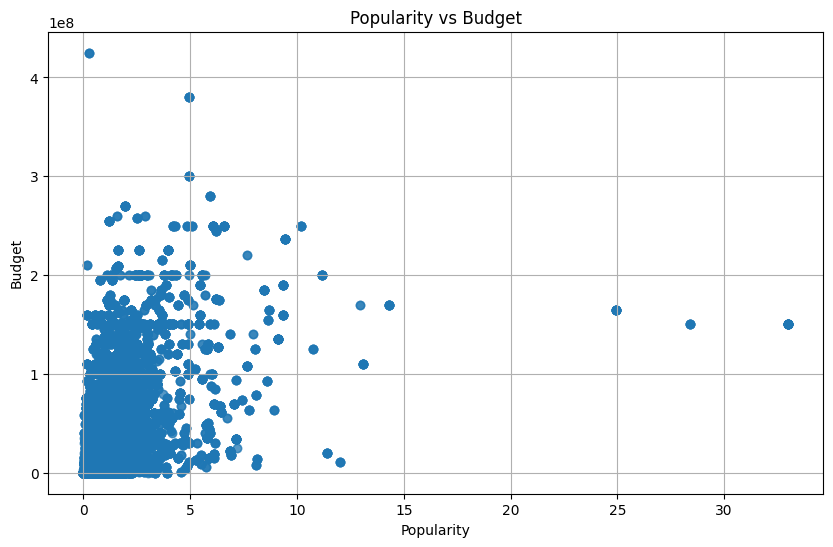

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['budget'], alpha=0.5)
plt.title('Popularity vs Budget')
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.grid(True)
plt.show()

### Research answer 9
No Clear Correlation: The scatter plot shows a dispersed distribution of points, suggesting there isn't a strong linear correlation between popularity and budget.
Some High-Budget, High-Popularity Movies: While there's no clear overall correlation, there are some movies with high popularity that also have a high budget. These appear as points in the upper-right quadrant of the scatter plot.
Many Low-Budget, High-Popularity Movies: There are many movies with high popularity that have a relatively low budget, indicated by points in the upper-left quadrant of the scatter plot.

### Research Question 10
do movies with the highest popularity have the highest revenue ?

In [ ]:
df_popularity_revenue = df.groupby("popularity")["revenue"].mean().sort_values(ascending=False)
df_popularity_revenue.head(10)

,revenue
popularity,
9.432768,2.781506e+09
11.173104,2.068178e+09
4.355219,1.845034e+09
7.637767,1.519558e+09
32.985763,1.513529e+09
9.335014,1.506249e+09
5.944927,1.405036e+09
5.711315,1.327818e+09
6.112766,1.274219e+09


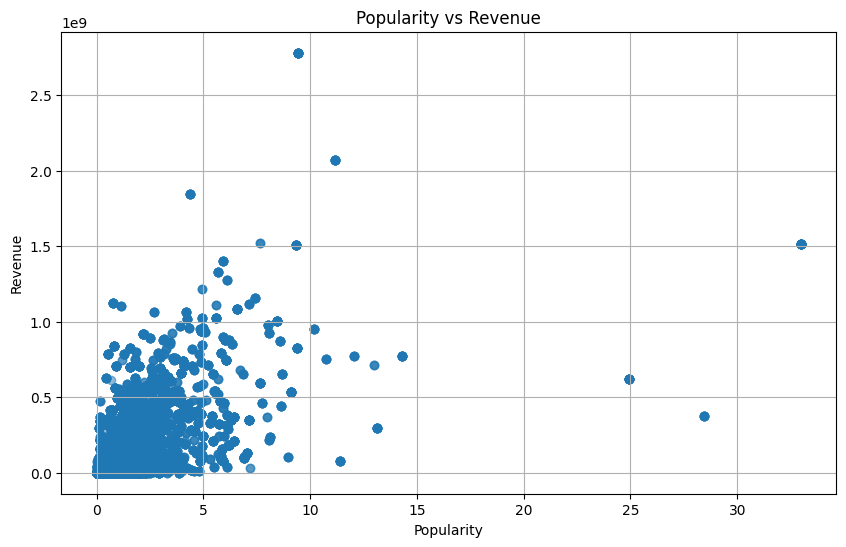

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['revenue'], alpha=0.5)
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

### Research answer 10
there is positive correlation between revenue and popularity but there is some out layers

### Research Question 11
do movies with the highest budget have the highest revenue ?

In [ ]:
df_budget_revenue = df.groupby("budget")["revenue"].sum().sort_values(ascending=False)
df_budget_revenue.head(10)

,revenue
budget,
150000000,248128906532
200000000,150071307707
100000000,118913338914
60000000,115088156383
40000000,113640953341
50000000,104617314644
70000000,104164184364
0,100495277688
80000000,95493968599


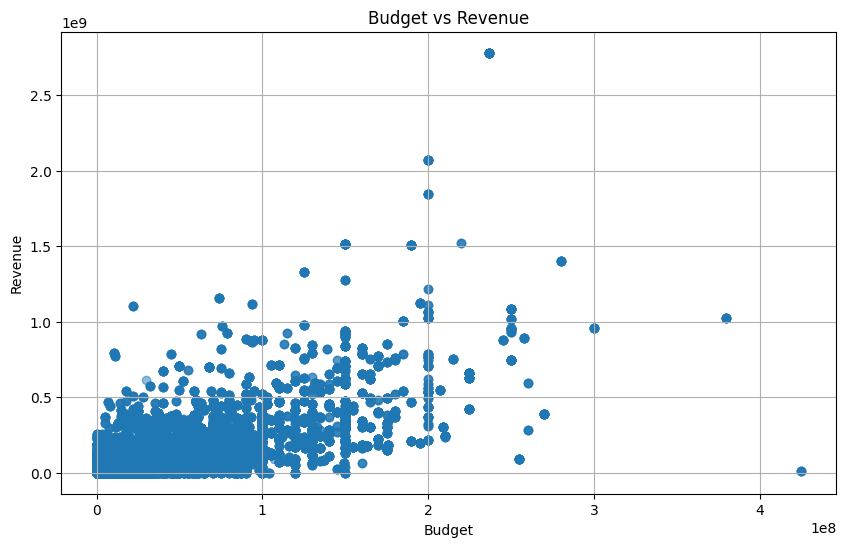

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

### Research answer 11
there is positive correlation between revenue and budget but there is some out layers

<a id='conclusions'></a>
## Conclusions
This project analyzed tmdb movies data The analysis revealed that:
<ul>
    <li>drama is the most popular genre
    <li>Adventure movies have the highest budget per movie and the highest revenue per movie
    <li>2015 movies are the most popular and have the highest revenue
    <li>2013 movies have the highest budget
    <li>Boram Entertainment Inc. have the highest budget per movie
    <li>Truenorth Productions have the highest revenue per movie
    <li>No Clear Correlation between popularity and budget
    <li>there is positive correlation between revenue and popularity but there is some out layers
    <li>there is positive correlation between revenue and budget but there is some out layers
</ul>


##Limitations

The dataset initially contained null values in several columns. Although rows with null values in crucial columns like 'genres' and 'production_companies' were removed, the remaining dataset may have missing data in other columns. This could impact the analysis, potentially leading to biased or incomplete results.

 This dataset focuses on movies and their associated information like revenue, budget, and popularity. But there could be other important factors for a comprehensive analysis that are not included, such as:

Critical Acclaim: Information on movie reviews, awards or ratings from critics are not present. This could affect understanding the relationship between critical acclaim and commercial success.

Audience Reception: Detailed data on audience reviews, social media sentiment, or viewership statistics is not included, limiting the depth of audience analysis.

Marketing and Distribution: Details about the marketing strategies and distribution channels used for movies are missing, preventing investigation into these aspects.